Computational modeling in python, SoSe2022

# Special functions in classes

Below is an example of a simple demo class implementing polynomials to illustrate the use of special functions. Special functions start and end with double underscore (sometimes they are called "dunder" functions) and are used to implement special functionality like overloading operators, deleting elements, initializations etc. Some of them, like `__init__` and `__str__`, we have already seen. 

The Polynomial class below supports a number of arythmetic operations:


In [1]:
import numpy

class Polynomial:
    """
    Class Polynomial

    init with Polynomial(n), with n integer >= 0
    
    
    P = a_0 + a_1*x + a_2*x**2 .... +a_n*x**n
    
    Only coefficients are stored, the power of x is determined 
    according to the position of the coefficient at runtime.  
    
    NOT STABLE FOR LARGE ORDERS
    """


    def __init__(self, order=0):
        "Initialize the polynomial with an order. Reserve space for coefficients"
        
        if order < 0:
            raise ValueError("Polynomial order must be greater or equal 0.")
        else:
            # variables or functions beginning with double underscore are 
            # private and cannot be accessed from outside the class
            
            self.__order = order
            self.coefficients = numpy.zeros([order+1], dtype=numpy.float64)
    
    
    def __str__(self):
        "String representation"
        string =  "Polynomial, order: " + str(self.__order)
        string += "\n             poly: " + ' + '.join([str(c)+" x^"+str(self.getorder()-n) \
                                                        for n,c in enumerate(self.coefficients[::-1])])
        return string
    
    def __eq__(self,other):
        "operator =="
        if self.getorder() != other.getorder():
            return False
        
        return numpy.array_equal(self.coefficients, other.coefficients)
    
    
    def __add__(self, other):
        "Operator +: Add two polynomials"

        if type(other) != type(self):
            return NotImplemented
        
            
        maxorder = max(self.getorder(), other.getorder())
        minorder = min(self.getorder(), other.getorder())
        
        newpoly = Polynomial(maxorder)

        for n in range(0,minorder+1):
            newpoly.coefficients[n] = self.coefficients[n] + other.coefficients[n]
            
        if self.getorder() > other.getorder():
            for n in range(minorder+1,maxorder+1):
                newpoly.coefficients[n] = self.coefficients[n]
                            
        elif other.getorder() > self.getorder():
            for n in range(minorder+1,maxorder+1):
                newpoly.coefficients[n] = other.coefficients[n]

        return newpoly


    def __sub__(self, other):
        "Operator -" 
        # first calls __mul__ for other and then __add__ 
        return self + other*(-1)


    def __mul__(self, other):
        "Operator *"
        if type(other) == type(self):
                
            neworder = self.getorder() + other.getorder()
            
            newpoly = Polynomial(neworder)
            
            for n in range(0,self.getorder()+1):
                for m in range(0,other.getorder()+1):
                    k = m+n
                    newpoly.coefficients[k] += self.coefficients[n] * other.coefficients[m]
                    
        else:
            try:
                fac = numpy.float64(other)
            except:
                return NotImplemented

            neworder = self.getorder() 
            newpoly = Polynomial(neworder)
            
            for n in range(0,self.getorder()+1):
                newpoly.coefficients[n] = self.coefficients[n] *  fac

                    
        return newpoly


    def __rmul__(self, other):
        "Reflective operator *"
        return self.__mul__(other)


    def __getitem__(self,n):
        "Operator [] (read)"
        return self.coefficients[n]


    def __setitem__(self,n, val):  
        "Operator [] (write)"
        self.coefficients[n] = val
        

    def __call__(self,x):
        "Behave like a function: evaluate the polynominal at position x"
        val = numpy.double(0.0)
        for n in range(0,self.getorder()+1):
            val = val + self.coefficients[n]*x**n
            
        return val
    
    
    def getorder(self):
        return self.__order
        
        

        

In [2]:
# Create two polynomials of order 2 and 3:

P2 = Polynomial(2)
P3 = Polynomial(3)

print(P2)
print(P3)

Polynomial, order: 2
             poly: 0.0 x^2 + 0.0 x^1 + 0.0 x^0
Polynomial, order: 3
             poly: 0.0 x^3 + 0.0 x^2 + 0.0 x^1 + 0.0 x^0


In [3]:
# the __order member is private:

print(P2.__order)

AttributeError: 'Polynomial' object has no attribute '__order'

In [4]:
# the __order member is private:
# order must be accessed with a member function

print(P2.getorder())

2


In [5]:
# set some coefficoients:
# uses __setitem__()

P2[2] = 1
print(P2)

Polynomial, order: 2
             poly: 1.0 x^2 + 0.0 x^1 + 0.0 x^0


In [6]:
# we can use slices
# uses __setitem__()

P3[1:4] = [1,2,4]
print(P3)

Polynomial, order: 3
             poly: 4.0 x^3 + 2.0 x^2 + 1.0 x^1 + 0.0 x^0


In [7]:
# Reating with []
# uses __getitem__()

print(P3[1:4])


[1. 2. 4.]


In [8]:
# using __add__()
# this calls P2.__add__(P3)

P4 = P2 + P3
print(P4)

Polynomial, order: 3
             poly: 4.0 x^3 + 3.0 x^2 + 1.0 x^1 + 0.0 x^0


In [9]:
# using __sub__()
# this calls P2.__sub__(P3)

P4 = P2 - P3
print(P4)

Polynomial, order: 3
             poly: -4.0 x^3 + -1.0 x^2 + -1.0 x^1 + 0.0 x^0


In [10]:
# using __mul__()
# this calls P2.__mul__(3)

P4 = P2 * 3
print(P4)

Polynomial, order: 2
             poly: 3.0 x^2 + 0.0 x^1 + 0.0 x^0


In [11]:
# using __mul__()
# this calls P2.__mul__(P3)

P4 = P2 * P3
print(P4)

Polynomial, order: 5
             poly: 4.0 x^5 + 2.0 x^4 + 1.0 x^3 + 0.0 x^2 + 0.0 x^1 + 0.0 x^0


In [12]:
# using __rmul__()

# this really calls 3.__mul__(P3) first
# what returns a NotImplemented error as type <int> does 
# not know how to multipy itself with type Polynomial
# Python then tries to call P3.__rmul__(3)

P4 = 3*P3
print(P4)

Polynomial, order: 3
             poly: 12.0 x^3 + 6.0 x^2 + 3.0 x^1 + 0.0 x^0


In [13]:
# using __eq__()

P4 == P3

False

In [14]:
P4 == 3*P3

True

In [15]:
# this calles P2.__mul__() which 
# returns NotImplemented so python tries
# "hello world"*P2 which also fails
# because class string does not 
# know how to multipy with class Polynomial 

P2*"hello world"

TypeError: can't multiply sequence by non-int of type 'Polynomial'

In [ ]:
# behave like a function
# uses P3.__call__() to return value of P3 at x

x = 1.0
y = P3(x)
print(y)

## Example: create the first N Legendre polynomials with recursion 
    
Legendre polynomials can be created with a simple recursion rule:

\begin{align}
L_0(x) &= 1 \\
L_1(x) &= x \\
\ldots&\\
nL_{n}(x) &= (2n-1)xL_{n-1}(x)-(n-1)L_{n-2}(x)
\end{align}

In [16]:
# constant. polynomial 1
L0 = Polynomial(0)
L0[0] = 1 # calls __setitem__()

# linear polynomial x
L1 = Polynomial(1)
L1[1] = 1
    
# list of legendre polynomials  
leg = [L0, L1]

# 
x=Polynomial(1)
x[1] = 1

N = 12
# use recursion to create the first N Legendre polynomials
for n in range(2,N):
    # uses __rmul__(), __mul__() and __sub__()
    
    L = leg[n-1] * x * ((2*n - 1)/n) - ((n - 1)/n) * leg[n-2]
    leg.append(L)

In [17]:
# plot the N-1th Legendre polynomial

npoints = 150
x = numpy.linspace(-.99,.99,npoints)

# uses __call__()
Leg11 = leg[N-1](x)

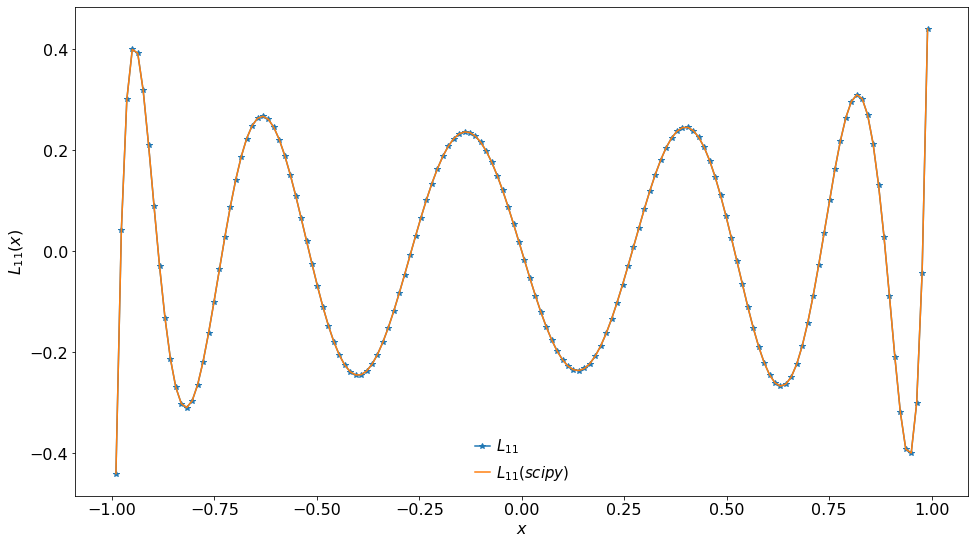

In [18]:
#let's plot the results and compare to scipy Legendre
import matplotlib.pyplot as plt
from scipy.special import legendre

Leg11scipy = legendre(N-1)(x)


mf=16
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(x,Leg11,marker='*',label=r'$L_{11}$')
ax.plot(x,Leg11scipy,marker='',label=r'$L_{11} (scipy)$')

ax.legend(handlelength=1, handletextpad=0.4,frameon=False,
              loc="best", prop={'size': 15})

ax.yaxis.set_tick_params(labelsize=mf)
ax.set_ylabel('$L_{11}(x)$',fontsize=mf)
ax.xaxis.set_tick_params(labelsize=mf)
ax.set_xlabel('$x$',fontsize=mf)
plt.show()

# Task:
Create your own class `Rational` that implements a type for rational numbers of the form $\frac{N}{M}$ where $N$ and $M$ are integers. Implement the `__mul__`, `__rmul__` operations for two objects of type `Rational` or `integer` and `Rational`. Do some research and and implement the devision operator `/` for two objects of type `Rational` or `integer` and `Rational`. Make sure that the integers $M$ and $N$ stay as small as possible.

Optional: Implement other arythmetic operators (`+`, `-`, `+=`,...), comparisons (`==`, `!=`, `<`,...) etc. or extend the `Polynomial` class above. 